In [1]:
from src.data import *
from src.prepare import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/MAX_threat_vs_safe.txt")

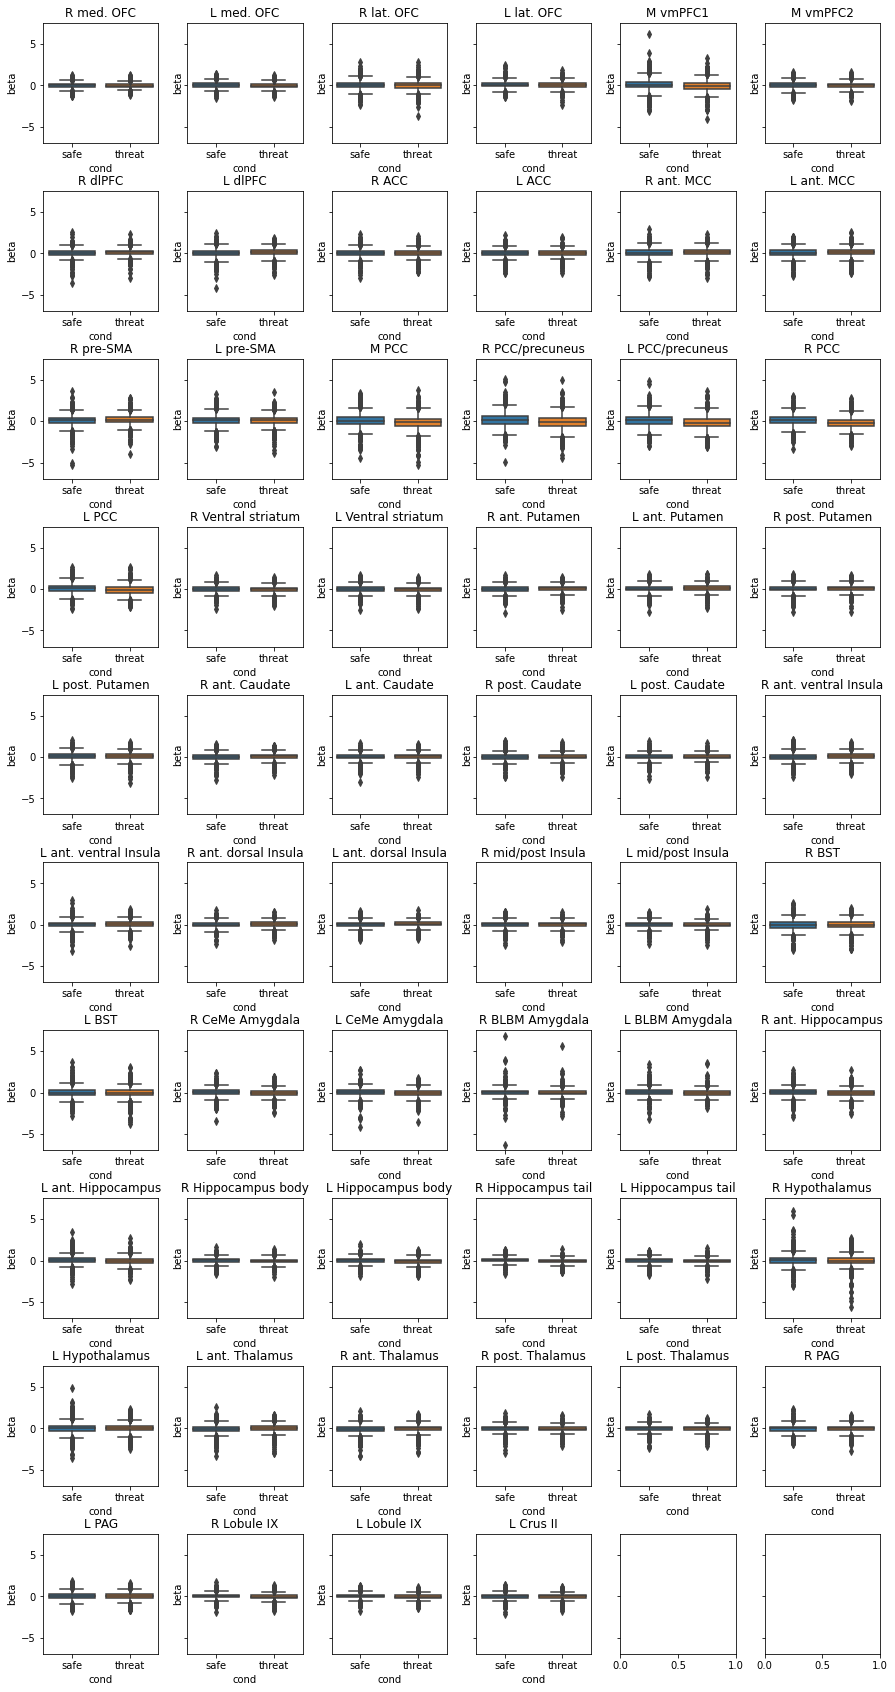

In [3]:
fig, axes = plt.subplots(nrows=10,ncols=6,figsize=(15,30),sharey=True)
fig.subplots_adjust(wspace=0.25,hspace=0.4)
axes = axes.flatten()

for ii, roi in enumerate(df.ROI.unique()):
    axes[ii].set_title(roi)
    sns.boxplot(x='cond',y='beta',data=df[df['ROI']==roi],ax=axes[ii])

In [4]:
df.ROI.unique()
#[table_BML(roi) for roi in ['L BST']]

array(['R med. OFC', 'L med. OFC', 'R lat. OFC', 'L lat. OFC', 'M vmPFC1',
       'M vmPFC2', 'R dlPFC', 'L dlPFC', 'R ACC', 'L ACC', 'R ant. MCC',
       'L ant. MCC', 'R pre-SMA', 'L pre-SMA', 'M PCC', 'R PCC/precuneus',
       'L PCC/precuneus', 'R PCC', 'L PCC', 'R Ventral striatum',
       'L Ventral striatum', 'R ant. Putamen', 'L ant. Putamen',
       'R post. Putamen', 'L post. Putamen', 'R ant. Caudate',
       'L ant. Caudate', 'R post. Caudate', 'L post. Caudate',
       'R ant. ventral Insula', 'L ant. ventral Insula',
       'R ant. dorsal Insula', 'L ant. dorsal Insula',
       'R mid/post Insula', 'L mid/post Insula', 'R BST', 'L BST',
       'R CeMe Amygdala', 'L CeMe Amygdala', 'R BLBM Amygdala',
       'L BLBM Amygdala', 'R ant. Hippocampus', 'L ant. Hippocampus',
       'R Hippocampus body', 'L Hippocampus body', 'R Hippocampus tail',
       'L Hippocampus tail', 'R Hypothalamus', 'L Hypothalamus',
       'L ant. Thalamus', 'R ant. Thalamus', 'R post. Thalamus',
    

In [5]:
lBST = pd.read_csv('data/MAX_threat_v_safe_L_BST_FC.txt')
lBST = lBST[lBST['spearmanr'] != 1.0]
lBST['r_z'] = lBST['spearmanr'].apply(lambda a: np.around(np.arctanh(a),4))

In [6]:
lBST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12406 entries, 0 to 12425
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Subj       12406 non-null  object 
 1   ROI        12406 non-null  object 
 2   cond       12406 non-null  float64
 3   spearmanr  12406 non-null  float64
 4   r_z        12406 non-null  float64
dtypes: float64(3), object(2)
memory usage: 581.5+ KB


In [7]:
lBST.head()

,Subj,ROI,cond,spearmanr,r_z
0,MAX101,R med. OFC,0.5,-0.3853,-0.4063
1,MAX101,L med. OFC,0.5,-0.0324,-0.0324
2,MAX101,R lat. OFC,0.5,-0.3618,-0.3790
3,MAX101,L lat. OFC,0.5,-0.3029,-0.3127
4,MAX101,M vmPFC1,0.5,-0.1000,-0.1003


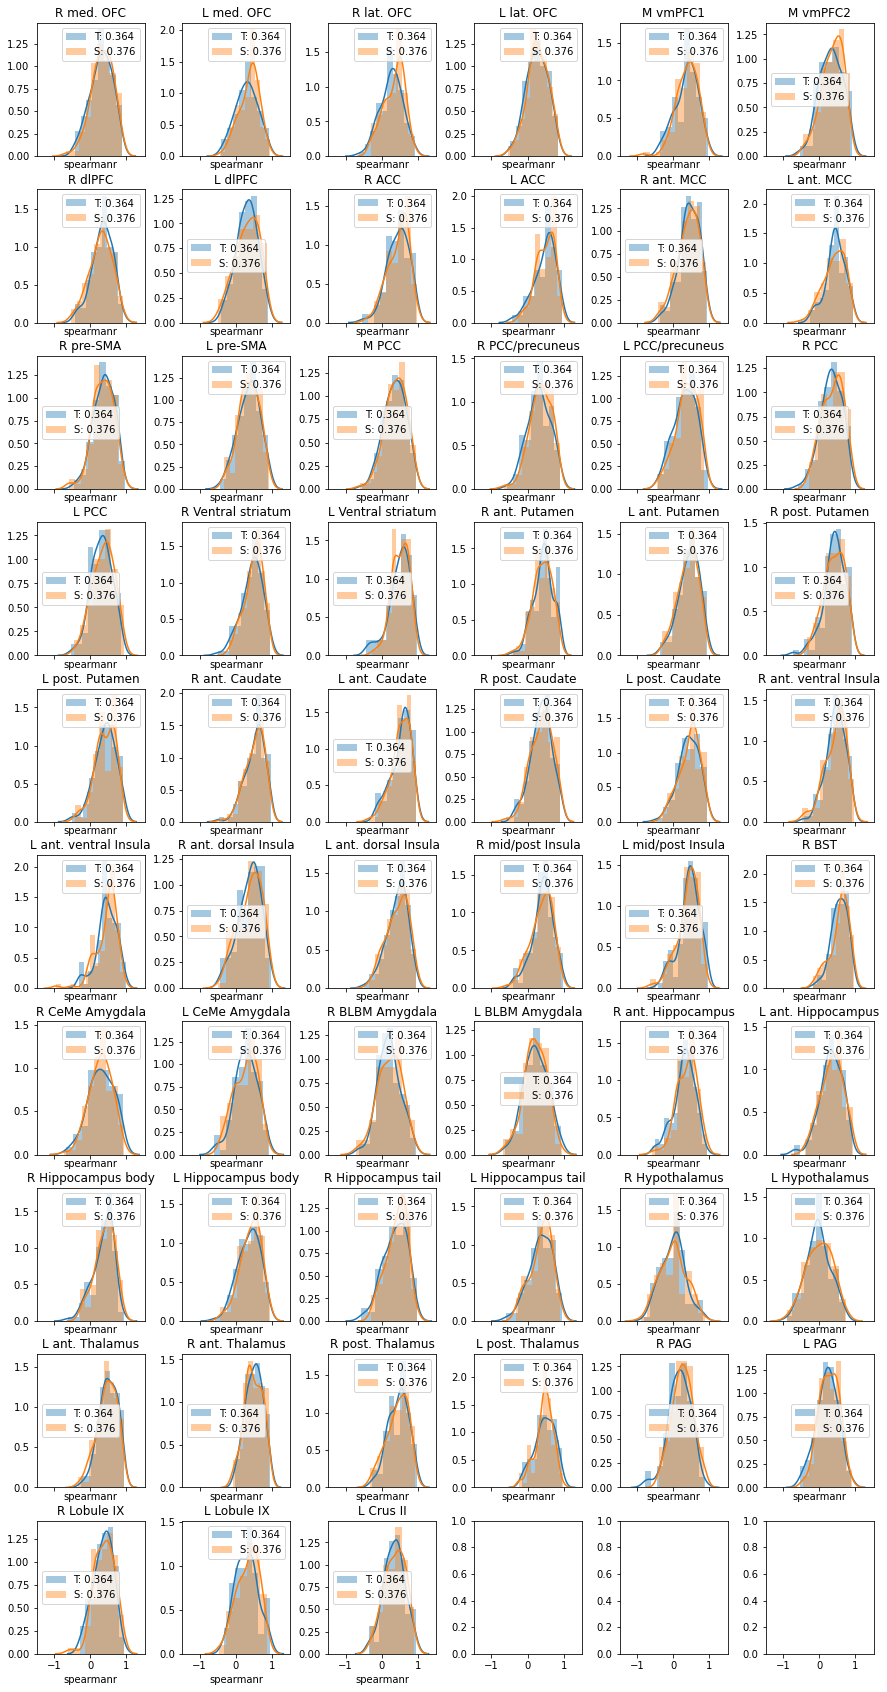

In [23]:
fig, axes = plt.subplots(nrows=10,ncols=6,figsize=(15,30),sharex=True)
fig.subplots_adjust(wspace=0.35,hspace=0.25)
axes = axes.flatten()

for ii, roi in enumerate(lBST.ROI.unique()):
    axes[ii].set_title(roi)
    #sns.boxplot(x='cond',y='r_z',data=lBST[lBST['ROI']==roi],ax=axes[ii])
    
    sns.distplot(lBST[(lBST['cond']==0.5) & (lBST['ROI'] == roi)].spearmanr,
                 label='T: %.3f' %(lBST[lBST['cond']==0.5].spearmanr.mean()),
                 ax=axes[ii])
    sns.distplot(lBST[(lBST['cond']==-0.5) & (lBST['ROI'] == roi)].spearmanr,
                 label='S: %.3f' %(lBST[lBST['cond']==-0.5].spearmanr.mean()),
                 ax=axes[ii])
    axes[ii].legend()

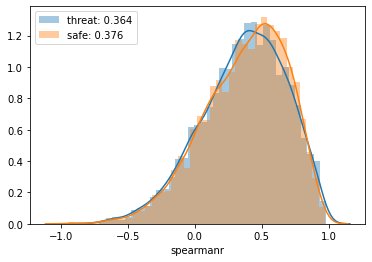

In [18]:
sns.distplot(lBST[lBST['cond']==0.5].spearmanr,label='threat: %.3f' %(lBST[lBST['cond']==0.5].spearmanr.mean()))
sns.distplot(lBST[lBST['cond']==-0.5].spearmanr,label='safe: %.3f' %(lBST[lBST['cond']==-0.5].spearmanr.mean()))
plt.legend()